In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_met = pd.read_csv('../data/xls_Bulath/Bullath_metadata.csv',sep = '\t')
df_smb      = pd.read_excel('../data/xls_Bulath/Bullath_all.xls', header=None)
smb_data    = df_smb.values[:,1:-1]
smb_time    = df_smb.values[:,0]

In [3]:
df_smb.columns = df_met.Name_orig

In [4]:
smb_coll = []
for i in df_met.Name_orig[1:]:
    subset = (df_smb[['Date', i]])
    subset.rename(columns = {i:'SMB'},  inplace=True)
    subset['Stake'] = i
    g_met = df_met.loc[lambda df_met: df_met['Name_orig'] == i, :]
    subset['Latitude']  = float(g_met.Latitude.values)
    subset['Longitude'] = float(g_met.Longitude.values)
    subset['Elevation'] = float(g_met.Elevation.values)
    subset.dropna(inplace=True)
    date_2 = []
    date_2.append(subset.Date[subset.index[0]])
    for j in subset.Date[0:-1]:
        date_2.append(j)

    smb_2 = []
    smb_2.append(0)
    for j in subset.SMB[0:-1]:
        smb_2.append(j)

    subset['Date1'] = date_2
    subset['SMB1'] = smb_2
    subset['Days'] = (subset['Date'] - subset['Date1']).dt.days
    subset['SMB_diff'] = -(subset['SMB1'] - subset['SMB'])
    subset = subset[['Stake', 'Date', 'Date1','Latitude', 'Longitude',
                     'Elevation', 'Days', 'SMB', 'SMB1', 'SMB_diff']]
    smb_coll.append(subset)

In [5]:
smb_coll_df = pd.concat(smb_coll, ignore_index=True)
smb_coll_df[['SMB_diff', 'SMB']] = smb_coll_df[['SMB_diff', 'SMB']]/100

In [10]:
df_s = smb_coll_df.sort_values(by=['Elevation', 'Date'])

In [11]:
df_s

Name_orig,Stake,Date,Date1,Latitude,Longitude,Elevation,Days,SMB,SMB1,SMB_diff
1397,R15,2008-01-05,2008-01-05,-62.178873,-58.907921,54.0,0,0.49203,0.000,0.49203
1398,R15,2008-01-26,2008-01-05,-62.178873,-58.907921,54.0,21,0.26200,49.203,-0.23003
1399,R15,2008-02-02,2008-01-26,-62.178873,-58.907921,54.0,7,0.23310,26.200,-0.02890
1400,R15,2008-02-09,2008-02-02,-62.178873,-58.907921,54.0,7,0.18954,23.310,-0.04356
1401,R15,2008-02-17,2008-02-09,-62.178873,-58.907921,54.0,8,-0.01600,18.954,-0.20554
...,...,...,...,...,...,...,...,...,...,...
1805,9N,2012-02-04,2012-01-20,-62.166223,-58.883543,261.0,15,0.79370,87.260,-0.07890
1806,9N,2012-02-19,2012-02-04,-62.166223,-58.883543,261.0,15,0.71200,79.370,-0.08170
1807,9N,2012-03-04,2012-02-19,-62.166223,-58.883543,261.0,14,0.80920,71.200,0.09720
1808,9N,2012-03-17,2012-03-04,-62.166223,-58.883543,261.0,13,0.59040,80.920,-0.21880


In [ ]:
stake = df_s.loc[lambda df: df['Stake'] == i, :]

In [17]:
smb_coll_df1 = smb_coll_df[['Stake', 'Date', 'Date1', 'Latitude', 'Longitude', 
                            'Elevation', 'Days','SMB_diff']]

In [21]:
smb_coll_df1.rename(columns={'SMB_diff':'SMB'}, inplace=True)

In [23]:
smb_coll_df1

Name_orig,Stake,Date,Date1,Latitude,Longitude,Elevation,Days,SMB
0,R1,2007-11-08,2007-11-08,-62.177620,-58.902406,82.0,0,0.68800
1,R1,2007-12-09,2007-11-08,-62.177620,-58.902406,82.0,31,0.07040
2,R1,2007-12-18,2007-12-09,-62.177620,-58.902406,82.0,9,-0.02110
3,R1,2007-12-26,2007-12-18,-62.177620,-58.902406,82.0,8,-0.08258
4,R1,2008-01-05,2007-12-26,-62.177620,-58.902406,82.0,10,-0.21472
...,...,...,...,...,...,...,...,...
2560,JN,2012-02-04,2012-01-20,-62.152849,-58.877932,231.0,15,-0.06902
2561,JN,2012-02-19,2012-02-04,-62.152849,-58.877932,231.0,15,-0.08397
2562,JN,2012-03-04,2012-02-19,-62.152849,-58.877932,231.0,14,-0.07208
2563,JN,2012-03-17,2012-03-04,-62.152849,-58.877932,231.0,13,-0.15580


In [22]:
smb_coll_df1.to_csv('../data/SMB_bellin_diff_1.csv', index=False, sep='\t')

In [8]:
labels = smb_coll_df.drop_duplicates(subset=['Stake'])

In [9]:
cs_file = '../data/SMB_bellin_diff.csv'
dfmb = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date'],
    parse_dates=['Date'], na_values='NAN')
labels = dfmb.drop_duplicates(subset=['Stake'])

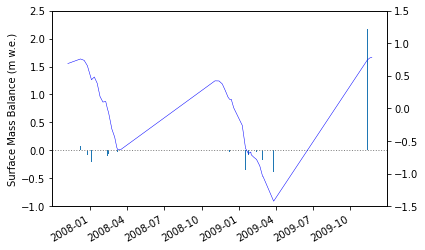

In [10]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
ax2 = ax1.twinx()

for i in labels['Stake'][0:1]:
    stake = dfmb.loc[lambda df: df['Stake'] == i, :]
    ax2.plot(stake['SMB']['20071101':'20091130'], 'b-', linewidth=0.5)
    smb_b = stake['SMB_diff']['20071101':'20091130']
    ax1.bar(smb_b.index, smb_b.values)
    ax1.axhline(0, linewidth=1, color='grey', linestyle =':')
#    print(smb_b)
#    ax1.plot(stake['SMB_diff']['20071101':'20080430'], 'b-', kind='bar')

#ax1.legend(['SMB'], loc='best')
ax1.set_ylabel(u'Surface Mass Balance (m w.e.)')
ax1.set_ylim(-1.0, 2.5)

#ax2.legend(['Days'], loc='best')
#ax2.set_ylabel('Days')
ax2.set_ylim(-1.5, 1.5)
fig.autofmt_xdate()
#fig.savefig('../fig/data_stakes_bellin.png',dpi = 150, bbox_inches = 'tight', 
#             pad_inches = 0.1, facecolor='w')